In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving only_number.csv to only_number.csv


In [ ]:

df = pd.read_csv("only_number.csv", skipinitialspace=True, 
                 sep=',')
df.head()


,IsBadBuy,VehicleAge,Make,Transmission,VehOdo,Size,MMRAcquisitionAuctionAveragePrice,MMRCurrentAuctionAveragePrice,VNZIP1,VehBCost,WarrantyCost
0,1,2,14,0,61184,5,6796,6628,33619,6100.0,533
1,0,3,5,0,92383,5,5480,5480,32124,4000.0,1630
2,0,2,5,0,45965,5,8067,7497,74135,7500.0,693
3,0,4,6,0,80169,11,4817,4817,85018,4725.0,1633
4,0,4,4,0,77372,11,5430,5370,75236,5670.0,1623


In [ ]:
df = pd.read_csv("only_number.csv", skipinitialspace=True, sep=',')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58132 entries, 0 to 58131
Data columns (total 11 columns):
IsBadBuy                             58132 non-null int64
VehicleAge                           58132 non-null int64
Make                                 58132 non-null int64
Transmission                         58132 non-null int64
VehOdo                               58132 non-null int64
Size                                 58132 non-null int64
MMRAcquisitionAuctionAveragePrice    58132 non-null int64
MMRCurrentAuctionAveragePrice        58132 non-null int64
VNZIP1                               58132 non-null int64
VehBCost                             58132 non-null float64
WarrantyCost                         58132 non-null int64
dtypes: float64(1), int64(10)
memory usage: 4.9 MB


In [ ]:
  df.corr()

,IsBadBuy,VehicleAge,Make,Transmission,VehOdo,Size,MMRAcquisitionAuctionAveragePrice,MMRCurrentAuctionAveragePrice,VNZIP1,VehBCost,WarrantyCost
IsBadBuy,1.000000,0.165456,0.027191,-0.003544,0.082686,0.000032,-0.105493,-0.106111,0.006608,-0.097721,0.049763
VehicleAge,0.165456,1.000000,0.078572,0.063223,0.316874,0.048791,-0.566641,-0.576883,-0.076183,-0.311124,0.257002
Make,0.027191,0.078572,1.000000,0.092688,-0.028827,-0.055242,-0.034255,-0.038071,-0.039098,-0.026219,-0.164160
Transmission,-0.003544,0.063223,0.092688,1.000000,-0.035496,-0.053686,-0.099709,-0.103628,0.012287,-0.143215,-0.112232
VehOdo,0.082686,0.316874,-0.028827,-0.035496,1.000000,0.049837,-0.016766,-0.030079,-0.053107,-0.063103,0.410785
Size,0.000032,0.048791,-0.055242,-0.053686,0.049837,1.000000,0.069005,0.069352,-0.008209,0.087511,0.182712
MMRAcquisitionAuctionAveragePrice,-0.105493,-0.566641,-0.034255,-0.099709,-0.016766,0.069005,1.000000,0.937479,0.046993,0.789078,-0.049058
MMRCurrentAuctionAveragePrice,-0.106111,-0.576883,-0.038071,-0.103628,-0.030079,0.069352,0.937479,1.000000,0.051726,0.778230,-0.056766
VNZIP1,0.006608,-0.076183,-0.039098,0.012287,-0.053107,-0.008209,0.046993,0.051726,1.000000,0.017140,-0.039348
VehBCost,-0.097721,-0.311124,-0.026219,-0.143215,-0.063103,0.087511,0.789078,0.778230,0.017140,1.000000,-0.033397


In [ ]:
col_drop=["IsBadBuy","VehicleAge","Make","Transmission","Size","VNZIP1"]

ValueError: ignored

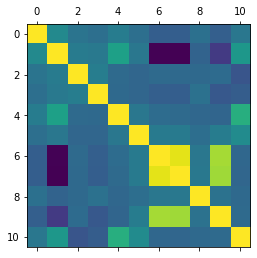

In [ ]:
plt.matshow(df.corr())
plt.xlabel(df.columns)


plt.show()

In [ ]:
df1= df.drop(columns=col_drop)

In [ ]:
df1.describe()

,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRCurrentAuctionAveragePrice,VehBCost,WarrantyCost
count,58132.000000,58132.000000,58132.000000,58132.000000,58132.000000
mean,71501.055116,6128.168479,6131.780242,6729.878580,1276.528883
std,14580.927833,2457.090544,2432.203872,1762.186191,599.220987
min,4825.000000,0.000000,0.000000,1.000000,462.000000
25%,61820.500000,4274.000000,4276.000000,5430.000000,837.000000
50%,73378.000000,6098.000000,6063.000000,6700.000000,1155.000000
75%,82443.250000,7761.000000,7737.000000,7900.000000,1623.000000
max,115717.000000,35722.000000,35722.000000,36485.000000,7498.000000


In [ ]:
df1[df1["MMRAcquisitionAuctionAveragePrice"]==0].shape[0]

645

### values above 15000 are considered as outliers, we are replacing missing values with mean of the column.

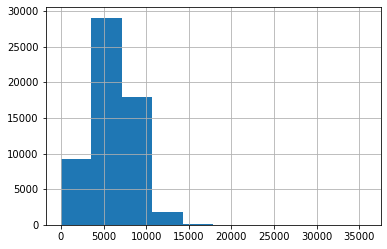

In [ ]:
df1["MMRAcquisitionAuctionAveragePrice"].hist(bins=10)

In [ ]:
df1.MMRAcquisitionAuctionAveragePrice.mean()

6128.168478634831

In [ ]:
df1.MMRAcquisitionAuctionAveragePrice = df1.MMRAcquisitionAuctionAveragePrice.replace(0,df1.MMRAcquisitionAuctionAveragePrice.mean())

In [ ]:
df1.describe()

,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRCurrentAuctionAveragePrice,VehBCost,WarrantyCost
count,58132.000000,58132.000000,58132.000000,58132.000000,58132.000000
mean,71501.055116,6196.163192,6131.780242,6729.878580,1276.528883
std,14580.927833,2369.805974,2432.203872,1762.186191,599.220987
min,4825.000000,884.000000,0.000000,1.000000,462.000000
25%,61820.500000,4359.750000,4276.000000,5430.000000,837.000000
50%,73378.000000,6128.168479,6063.000000,6700.000000,1155.000000
75%,82443.250000,7761.000000,7737.000000,7900.000000,1623.000000
max,115717.000000,35722.000000,35722.000000,36485.000000,7498.000000


In [ ]:
df1.MMRCurrentAuctionAveragePrice = df1.MMRCurrentAuctionAveragePrice.replace(0,df1.MMRCurrentAuctionAveragePrice.mean())

In [ ]:
df1.VehBCost = df1.VehBCost.replace(0,df1.VehBCost.mean())

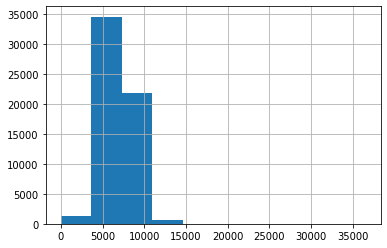

In [ ]:
df1.VehBCost.hist(bins=10)

In [ ]:
df1[df1["VehBCost"]<=2000].shape

(8, 5)

### as we observed VehBcost below 2000 are only 8 so, we remove those values

In [ ]:
df1[df1["VehBCost"]>=13000].shape

(21, 5)

### And values above 13000 are only 21 so we remove them

In [1]:
df1.drop(df1[df1.VehBCost <= 2000].index, inplace = True) 

df1.drop(df1[df1.VehBCost >= 13000].index, inplace = True) 

NameError: ignored

In [2]:
df1.describe()

NameError: ignored

In [ ]:
df1.MMRAcquisitionAuctionAveragePrice.hist(bins=10)

In [ ]:
df1[df1["MMRAcquisitionAuctionAveragePrice"]<=1500].shape

In [ ]:
df1[df1["MMRAcquisitionAuctionAveragePrice"]>=15000].shape

### values below 1500 are 66 and above 15000 are 83. so values droped from Dataset

In [ ]:
df1.drop(df1[df1.MMRAcquisitionAuctionAveragePrice <= 1500].index, inplace = True)

df1.drop(df1[df1.MMRAcquisitionAuctionAveragePrice <= 2000].index, inplace = True)

In [ ]:
df1.describe()

,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRCurrentAuctionAveragePrice,VehBCost,WarrantyCost
count,57571.000000,57571.000000,57571.000000,57571.000000,57571.000000
mean,71459.993625,6232.283349,6207.295858,6752.869736,1273.302531
std,14543.204905,2321.360566,2335.212155,1719.522323,594.752180
min,5368.000000,2001.000000,369.000000,2060.000000,462.000000
25%,61786.000000,4414.000000,4372.000000,5480.000000,837.000000
50%,73326.000000,6128.168479,6131.780242,6735.000000,1155.000000
75%,82389.500000,7774.000000,7750.000000,7900.000000,1623.000000
max,115717.000000,21870.000000,21837.000000,12812.000000,7498.000000


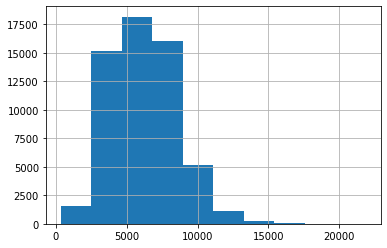

In [ ]:
df1.MMRCurrentAuctionAveragePrice.hist(bins=10)

In [ ]:
df1[df1["MMRCurrentAuctionAveragePrice"]<=1800].shape

(89, 5)

In [ ]:
df1[df1["MMRCurrentAuctionAveragePrice"]>=15000].shape

(85, 5)

### values below 1800 are 89, above 15000 are 85 so, dropped from dataset

In [ ]:
df1.drop(df1[df1.MMRCurrentAuctionAveragePrice <= 1800].index, inplace = True)

df1.drop(df1[df1.MMRCurrentAuctionAveragePrice >= 15000].index, inplace = True)

In [ ]:
df1.describe()

,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRCurrentAuctionAveragePrice,VehBCost,WarrantyCost
count,57397.000000,57397.000000,57397.000000,57397.000000,57397.000000
mean,71449.661324,6221.951975,6199.805074,6750.162947,1272.768542
std,14537.988775,2290.830498,2298.566591,1713.124953,593.618629
min,5368.000000,2001.000000,1801.000000,2060.000000,462.000000
25%,61774.000000,4417.000000,4380.000000,5480.000000,837.000000
50%,73314.000000,6128.168479,6131.780242,6735.000000,1155.000000
75%,82370.000000,7769.000000,7746.000000,7900.000000,1623.000000
max,115717.000000,19250.000000,14995.000000,12590.000000,7498.000000


In [ ]:
df1.to_csv("6th_cleaned.csv")

# Data understanding

we observe the distributions of the attributes without considering is it good buy or not

In [ ]:
from pandas.plotting import scatter_matrix

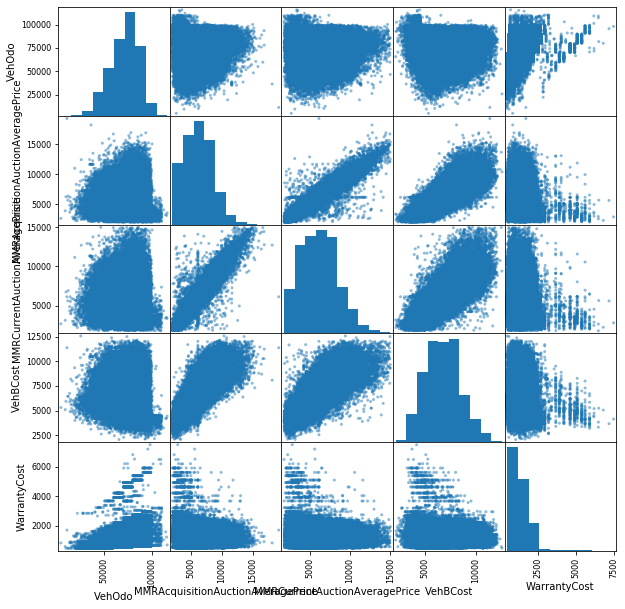

In [ ]:
scatter_matrix(df1, figsize=(10, 10))
plt.show()

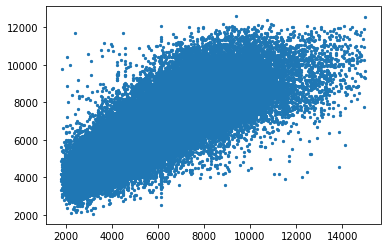

In [ ]:
plt.scatter(df1['MMRCurrentAuctionAveragePrice'],df1['VehBCost'], s=5)
plt.show()

## Clustering Preprocessing - Normalization  
A good practice in clustering to avoid the bias given by the range of the different attribute is normalization.  
The most common adopted normalizations are: Z-Score and Min-Max

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df1)

In [ ]:
X

array([[0.50581337, 0.27798713, 0.36584811, 0.38366572, 0.01009096],
       [0.78854362, 0.20169285, 0.27883887, 0.18423552, 0.16600341],
       [0.3678964 , 0.35167256, 0.43171138, 0.51661918, 0.03283115],
       ...,
       [0.59629901, 0.13971824, 0.2167652 , 0.24976258, 0.09849346],
       [0.58384761, 0.32314917, 0.42595119, 0.4691358 , 0.17637862],
       [0.72459198, 0.13200765, 0.17159315, 0.32905983, 0.01876066]])

# K-Means

## K-Means in Python  ([sklearn](http://scikit-learn.org/stable/modules/clustering.html#k-means))

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=100)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

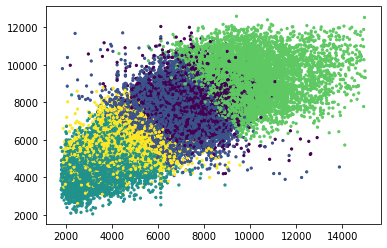

In [ ]:
plt.scatter(df1['MMRCurrentAuctionAveragePrice'], df1['VehBCost'], 
            c=kmeans.labels_, s=5)
plt.show()

In [ ]:
kmeans.cluster_centers_

array([[0.45052045, 0.31624514, 0.43156352, 0.53308564, 0.06850948],
       [0.67349995, 0.27642564, 0.37139743, 0.49630445, 0.14518506],
       [0.69119972, 0.09914331, 0.14317357, 0.25971859, 0.14805955],
       [0.64814511, 0.45385372, 0.60818832, 0.67180281, 0.12292181],
       [0.4749539 , 0.15323034, 0.21362382, 0.34732469, 0.06871296]])

In [ ]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

In [ ]:
centers

array([[55082.48118136,  7455.9124872 ,  7495.04908336,  7673.3917891 ,
          944.0327327 ],
       [79688.04612522,  6769.06590877,  6701.21763885,  7286.08586733,
         1483.52206826],
       [81641.19777846,  3711.12303092,  3690.03203552,  4794.83677877,
         1503.74699167],
       [76890.1644642 ,  9829.52273089,  9825.43668909,  9134.08356079,
         1326.87782316],
       [57778.68784778,  4644.07006929,  4619.55265115,  5717.32893556,
          945.46436905]])

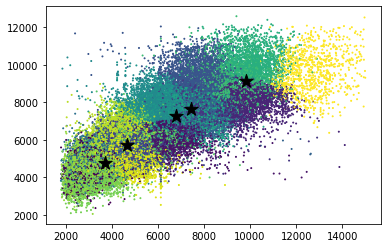

In [ ]:
plt.scatter(df1['MMRCurrentAuctionAveragePrice'], df1['VehBCost'], 
            c=kmeans.labels_, s=1)
plt.scatter(centers[:,1], centers[:,3], s=200, marker='*', c='k')
plt.show()

Visualization of clusters centers by means of parallel coordinates

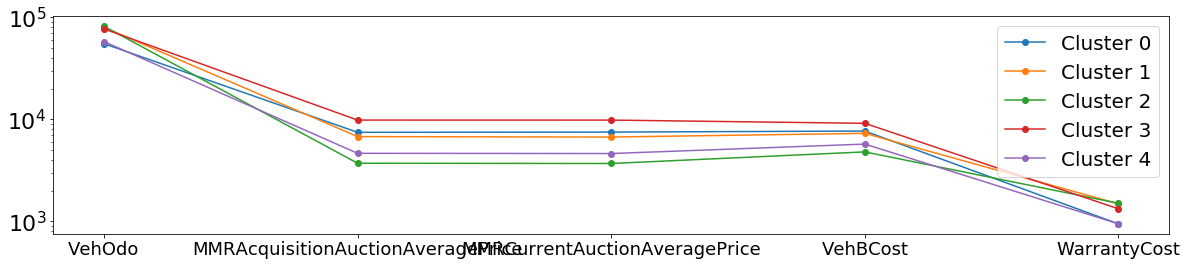

In [ ]:
plt.figure(figsize=(20, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0, len(df1.columns)), df1.columns, fontsize=18)
plt.yscale("log")
plt.legend(fontsize=20)
plt.show()

In [ ]:
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

SSE 1750.7772075007385
Silhouette 0.2673808375143142


Knee Method to estimate the best K

In [ ]:
sse_list = list()
max_k = 20
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X)
    
    sse = kmeans.inertia_
    sse_list.append(sse)

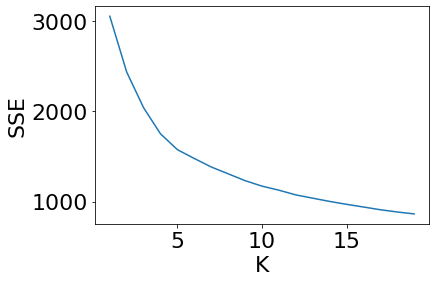

In [ ]:
plt.plot(range(1, len(sse_list) + 1), sse_list)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

K=5 would be the best estimation 